[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


<IPython.core.display.Javascript object>


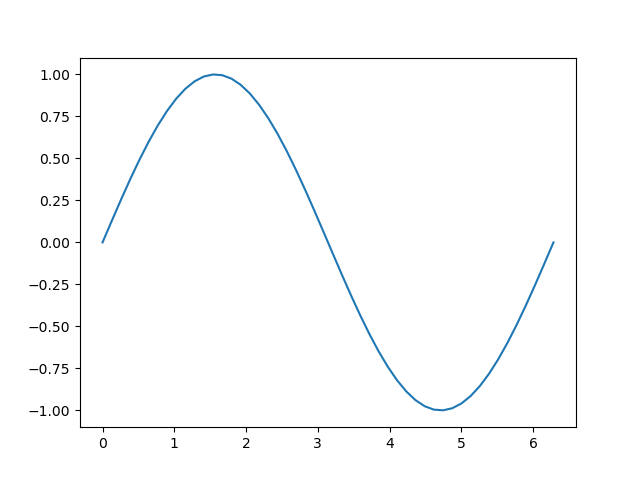

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
print(t)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1]) # axis limits

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

plt.show()

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                          init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=s, vmin=0, vmax=1,
                                    cmap="jet", edgecolor="k")
        self.ax.axis([-10, 10, -10, 10])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        xy = (np.random.random((self.numpoints, 2))-0.5)*10
        s, c = np.random.random((self.numpoints, 2)).T
        while True:
            xy += 0.03 * (np.random.random((self.numpoints, 2)) - 0.5)
            s += 0.05 * (np.random.random(self.numpoints) - 0.5)
            c += 0.02 * (np.random.random(self.numpoints) - 0.5)
            yield np.c_[xy[:,0], xy[:,1], s, c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        self.scat.set_array(data[:, 3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


if __name__ == '__main__':
    a = AnimatedScatter()
    plt.show()

<IPython.core.display.Javascript object>